![Exercise 2.11](images/Exercise2.11-Sutton.jpeg)

# Here is the Fig 2.6 that we have to follow:

![Fig 2.6 Sutton's book](images/Fig2.6.jpeg)

## Note: The UCB algorithm
![UCB Formula](images/UCB.jpeg)

In [1]:
import numpy as np

class Bandit:
    
    def __init__(self, mu = 1, k = 10):
        """
        By default creates an array of size k and mean of 1 which represents the q*(a).
        """
        self.mu = mu
        self.k = k
        self.Qstars = np.ones(k) * mu
        #print(self.Qstars)
        
    def __step(self):
        for i in range(0, len(self.Qstars)):
            self.Qstars[i] += np.random.normal(0, 0.01)
        #print(self.Qstars)
            
    def pull_a_bandit(self, lever):
        if lever < len(self.Qstars) and lever >=0:
            reward = np.random.normal(self.Qstars[lever], 1)
            self.__step()
            return reward
        else:
            raise Exception(f"Number {lever} out of range")
            
    def reset(self):
        self.Qstars = np.ones(self.k) * self.mu
            
    def print_bandit_content(self):
        print(self.Qstars)

In [2]:
class Bandit_Agent:
    
    def __init__(self, bandit, initial_val=5):
        self.action_values = np.zeros(10) # Q(a)
        self.counts = np.zeros(10) # N(a)
        self.iteration_number = 0
        self.total_reward = 0
        self.bandit = bandit
        self.initial_val = initial_val # = 5 as used by Sutton in section 2.6 (P.34)
        
    def greedy_update(self):
        self.iteration_number += 1
        action_index = np.argmax(self.action_values) # Choose the best action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def optimistic_initial_value_greedy_update(self, alpha=0.1):
        if self.iteration_number == 0:   # Checks for the first iteration and the first optimistic initializations 
            self.action_values = np.ones(10) * self.initial_val
        self.iteration_number += 1
        action_index = np.argmax(self.action_values) # Choose the best action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + alpha * (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def ucb_update(self, alpha=0.1,c=2):
        """
        Upper-Confidence-Bound Action Selection
        """
        self.iteration_number += 1 # t
        action_index = np.argmax(self.action_values + c * np.sqrt(np.log(self.iteration_number) / self.counts)) # Choose the best action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + alpha * (reward - self.action_values[action_index])
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_update(self, epsilon=0.01):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_constant_update(self, epsilon=0.1, alpha=0.1):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + alpha * (reward - self.action_values[action_index])
        return self.total_reward/self.iteration_number
        
    def obj_print(self):
        print(f"{self.action_values},avg_reward={self.total_reward/self.iteration_number},best_action={self.best_action()}")
        
    def best_action(self):
        return np.max(self.action_values)

## Answering Exercise 2.11:

In [3]:
import time

agent_constant_update_bandit = Bandit() 
#agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit) # Moved them before the second for loop, to be honest don't know how it worked before!

EPOCHS  = 200000 #= 200000
epochs_for_average_last_rewards = 100000 #= 100000  
epsilons = np.array([1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1])
average_rewards = np.zeros(epsilons.shape)

stime = time.time()
for i in range(len(epsilons)):
    agent_constant_update_bandit.reset() # Resetting the bandit to its initial values
    agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit) # Creating a new agent for this epsilon
    print(f"Doing epsilons[{i}] = {epsilons[i]} ...")
    for e in range(0,EPOCHS):
        #epsilon_greedy_constant_rewards[i] = agent_constant_update.epsilon_greedy_constant_update(epsilon=e, alpha=0.1) # Reading e from the outer for loop
        current_reward = agent_constant_update.epsilon_greedy_constant_update(epsilon=epsilons[i], alpha=0.1) # epsilons[i] sets the epsilon
        if e >= epochs_for_average_last_rewards:
            average_rewards[i] += current_reward
    average_rewards[i] /= epochs_for_average_last_rewards
    print(f"The average reward of epsilons[{i}] = {epsilons[i]} is equal to {average_rewards[i]}")
etime = time.time()
print("It took {} seconds to run this cell".format(etime - stime))

Doing epsilons[0] = 0.00390625 ...
The average reward of epsilons[0] = 0.00390625 is equal to 6.00652872672746
Doing epsilons[1] = 0.0078125 ...
The average reward of epsilons[1] = 0.0078125 is equal to 5.671672392803361
Doing epsilons[2] = 0.015625 ...
The average reward of epsilons[2] = 0.015625 is equal to 7.480657117680134
Doing epsilons[3] = 0.03125 ...
The average reward of epsilons[3] = 0.03125 is equal to 3.1900979593029852
Doing epsilons[4] = 0.0625 ...
The average reward of epsilons[4] = 0.0625 is equal to 5.60394141081051
Doing epsilons[5] = 0.125 ...
The average reward of epsilons[5] = 0.125 is equal to 4.373550712686634
Doing epsilons[6] = 0.25 ...
The average reward of epsilons[6] = 0.25 is equal to 5.224521580587458
Doing epsilons[7] = 0.5 ...
The average reward of epsilons[7] = 0.5 is equal to 4.110862361949027
Doing epsilons[8] = 1.0 ...
The average reward of epsilons[8] = 1.0 is equal to 1.7055251442660873
It took 84.70808339118958 seconds to run this cell


In [4]:
print(f"Max value occurs with epsilon = {epsilons[np.argmax(average_rewards)]}")

average_rewards

Max value occurs with epsilon = 0.015625


array([6.00652873, 5.67167239, 7.48065712, 3.19009796, 5.60394141,
       4.37355071, 5.22452158, 4.11086236, 1.70552514])

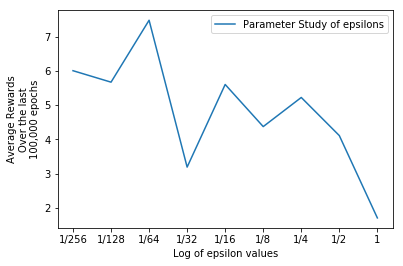

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, len(epsilons))
parameter_study_plot, = plt.plot(np.log(epsilons[x]),average_rewards[x])
plt.xlabel("Log of epsilon values")
plt.ylabel("Average Rewards\nOver the last\n100,000 epochs")
plt.xticks(np.log(epsilons[x]),["1/256", "1/128", "1/64", "1/32", "1/16", "1/8", "1/4", "1/2", "1"])
plt.legend([parameter_study_plot],["Parameter Study of epsilons"])
plt.show()

After different experiments, we came to this conclusion that the optimal $\epsilon$ ($\epsilon^{*}$) fluctuates in this interval $[0.1, 0.5]$.


## Enhancement 1: ## 
##### To better observe the behavior of the constant update algorithm using different epsilons ($\epsilon$), we run 200 different experiments and average over all of them and chart the result. #####

In [ ]:
import time

agent_constant_update_bandit = Bandit() 
#agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit) # Moved them before the second for loop, to be honest don't know how it worked before!

RUNS = 200
EPOCHS  = 200000
epochs_for_average_last_rewards = int(EPOCHS / 2) #= 100000  
epsilons = np.array([1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1])
average_rewards = np.zeros((RUNS, epsilons.shape[0]))

stime = time.time()
for epsilon in range(len(epsilons)):
    for run in range(0, RUNS):
        agent_constant_update_bandit.reset() # Resetting the bandit to its initial values
        agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit) # Creating a new agent for this epsilon
        #print(f"Doing Run #{run} epsilons[{epsilon}] = {epsilons[epsilon]} ...")
        for e in range(0,EPOCHS):
            #epsilon_greedy_constant_rewards[i] = agent_constant_update.epsilon_greedy_constant_update(epsilon=e, alpha=0.1) # Reading e from the outer for loop
            current_reward = agent_constant_update.epsilon_greedy_constant_update(epsilon=epsilons[epsilon], alpha=0.1) # epsilons[i] sets the epsilon
            if e >= epochs_for_average_last_rewards:
                average_rewards[run, epsilon] += current_reward
        average_rewards[run, epsilon] /= epochs_for_average_last_rewards
    print(f"The epsilons[{epsilon}] = {epsilons[epsilon]} finished.")
etime = time.time()
print("It took {} seconds to run this cell".format(etime - stime))

In [ ]:
# Processing collected rewards for chart

average_rewards_mean = np.zeros(len(epsilons))
average_rewards_std = np.zeros(len(epsilons))

for epsilon in range(len(epsilons)):
    average_rewards_mean[epsilon] = average_rewards[0:RUNS, epsilon].mean()
    average_rewards_std[epsilon] = average_rewards[0:RUNS, epsilon].std()
    
print(average_rewards_mean)
print(average_rewards_std)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Charting them
x = np.arange(0, len(epsilons))
fig, ax = plt.subplots(1)
ax.plot(x, average_rewards_mean, lw=1, label='Constant Updates With different Epsilons', color='blue', ls='-')
ax.fill_between(x, average_rewards_mean - average_rewards_std, # Lower bound
                average_rewards_mean + average_rewards_std, # Upper bound
                facecolor='blue', alpha=0.1)
ax.legend(loc='lower center')

ax.set_xlabel('Steps')
ax.set_ylabel('Average\nRewards')
ax.set_title("The average rewards are calculated between the mean-std and mean+std")
ax.set_xticklabels(["null", "1/256", "1/128", "1/64", "1/32", "1/16", "1/8", "1/4", "1/2", "1"])
ax.grid()
fig.show()

## Enhancement 2: ## 
##### To better observe the behavior of the constant update algorithm using different epsilons ($\epsilon$) and its interplay with different values of alpha ($\alpha$), we run 2000 different experiments and average over all of them and chart the result in a 3D plot. #####